### <center>Classsification Techniques</center>

In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
iris = pd.read_csv("Iris.csv")

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### removing unneeded column

In [9]:
iris.drop("Id", axis=1, inplace = True)

### Some EDA with Iris

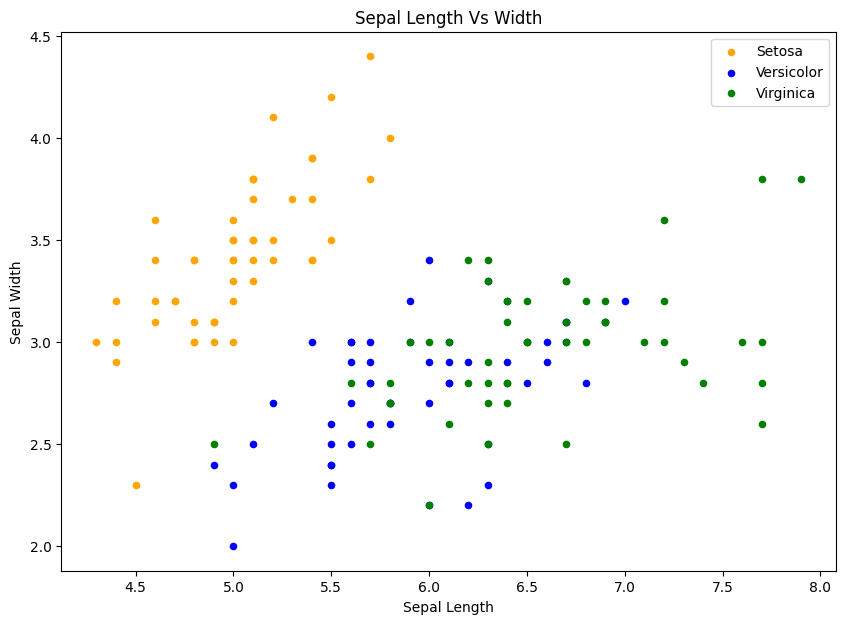

In [10]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

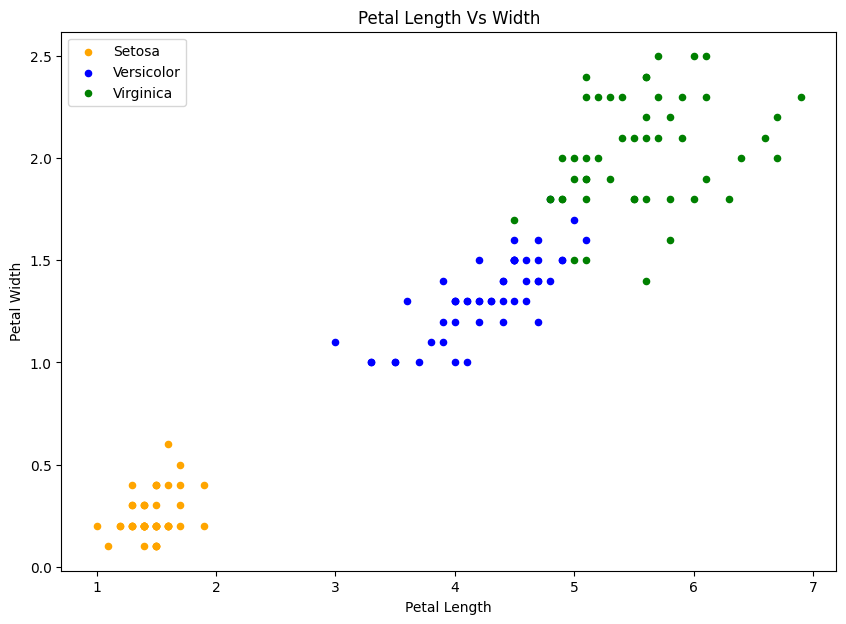

In [11]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

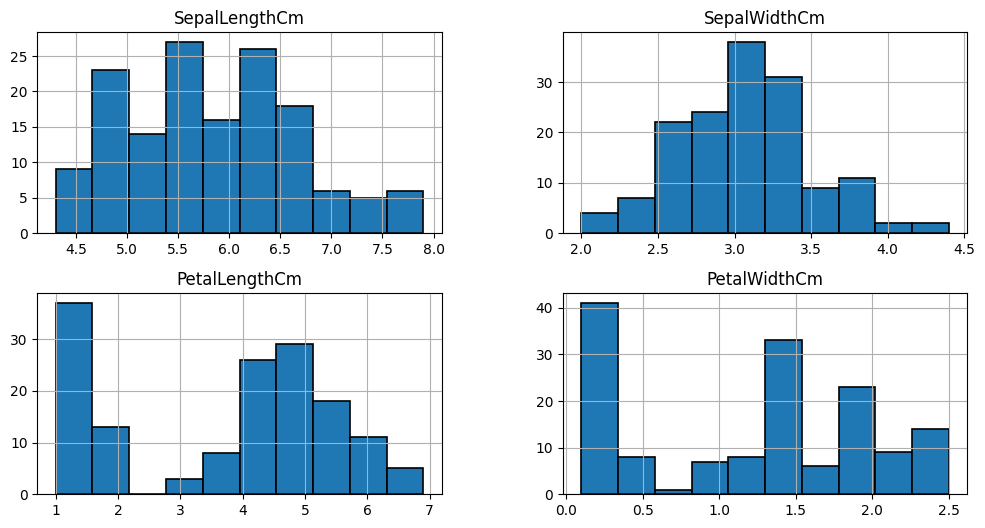

In [12]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [13]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn import metrics # for checking the model accuracy

In [14]:
iris.shape

(150, 5)

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.


<ipython-input-15-081d78fc481b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()


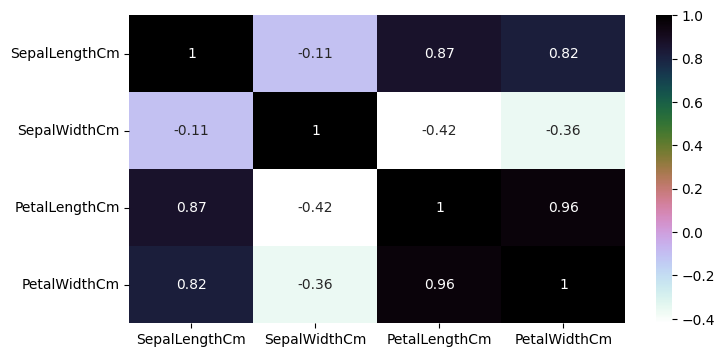

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()
plt.show()

Observation--->
The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated
We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
Then pass the training dataset to the algorithm to train it. We use the .fit() method
Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
We then check the accuracy by passing the predicted outcome and the actual output to the model.

## Splitting The Data into Training And Testing Dataset

In [16]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [17]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [18]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
72,6.3,2.5,4.9,1.5
42,4.4,3.2,1.3,0.2
38,4.4,3.0,1.3,0.2
99,5.7,2.8,4.1,1.3
80,5.5,2.4,3.8,1.1


In [19]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
121,5.6,2.8,4.9,2.0
145,6.7,3.0,5.2,2.3
84,5.4,3.0,4.5,1.5
46,5.1,3.8,1.6,0.2
132,6.4,2.8,5.6,2.2


In [20]:
train_y.head()

72    Iris-versicolor
42        Iris-setosa
38        Iris-setosa
99    Iris-versicolor
80    Iris-versicolor
Name: Species, dtype: object

In [21]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
model1 = LogisticRegression(random_state=0, max_iter=1000)

# we train the algorithm with training data and training output
model1.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction1 = model1.predict(test_X)
print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(prediction1, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the Logistic Regression is:  1.0


In [22]:
from sklearn.tree import DecisionTreeClassifier # for using DTA
model2 = DecisionTreeClassifier()

# we train the algorithm with training data and training output
model2.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction2 = model2.predict(test_X)
print('The accuracy of the Decision Tree Classifier is: ', metrics.accuracy_score(prediction2, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the Decision Tree Classifier is:  0.9777777777777777


In [23]:
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
model3 = KNeighborsClassifier()

# we train the algorithm with training data and training output
model3.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction3 = model3.predict(test_X)
print('The accuracy of the K-Neighbors Classifier is: ', metrics.accuracy_score(prediction3, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the K-Neighbors Classifier is:  1.0


In [24]:
from sklearn import svm # for suport vector machine algorithm
#Try all kernals ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model4 = svm.SVC(kernel='poly') # select the svm algorithm

# we train the algorithm with training data and training output
model4.fit(train_X, train_y)+

# we pass the testing data to the stored algorithm to predict the outcome
prediction4 = model4.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction4, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  1.0


**Task:**
1. Classify penguin species using standard machine learning models. (https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)
2. Diagnosis Breast Cancer using machine learning techniques. (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)